In [1]:

import requests
import PIL 
import os
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
import tensorflow.keras as keras
from keras.preprocessing import image
from tensorflow.keras import layers


2022-05-01 21:04:10.859949: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/terrell/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-05-01 21:04:10.859972: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv('MTG_data.csv') #may need to change file name based on where the csv file is in your directory

In [3]:
def grab_image(img_path):
    i = np.asarray(PIL.Image.open(requests.get(img_path, stream=True).raw))
    i = np.expand_dims(i, axis = 0)
    return i

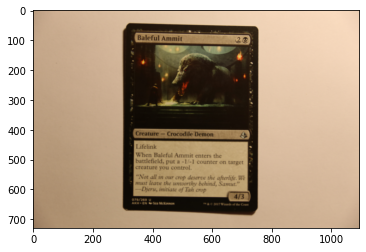

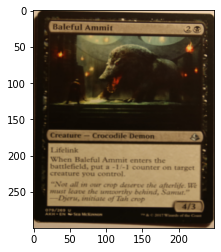

In [67]:
num = 1
totalPics = 30              # Set up variables

while num < 31 :            # 30 images prepared in given folder
    image = cv2.imread("Pics/img" + str(num) + ".jpg", cv2.IMREAD_UNCHANGED)
    scale_percent = 20      # percent of original size
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    scale_percent = 20      # percent of original size
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    image2= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    if num == 1 :
        plt.imshow(image2)
        plt.show()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    canny = cv2.Canny(gray, 130, 255, 1)

    cnts = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        ROI = image[y:y+h, x:x+w]
        break
    
                            # Find new width/height of extracted image.
    width2 = int(ROI.shape[1] * scale_percent / 100)
    height2 = int(ROI.shape[0] * scale_percent / 100)
    
    if width2 > height2:    # If width more than height, it's sideways.
        ROI = cv2.rotate(ROI, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
    
    width = 250             # Set up width and height to resize
    height = 300
    dim = (width, height)
 
                            # resize image
    ROI = cv2.resize(ROI, dim, interpolation = cv2.INTER_AREA)

    path = 'Results'
    isExist = os.path.exists(path)

    if not isExist :
        os.makedirs(path)
        
    cv2.imwrite("Results/card" + str(num) + ".png", ROI)

    ROI= cv2.cvtColor(ROI, cv2.COLOR_BGR2RGB)

                            #If first image, print it.
    if num == 1 :
        plt.imshow(ROI)
        plt.show()
        
    num += 1

In [5]:
elm_num = 15000 #len(df['File_Name'])

In [6]:
### Original code for offline access
directory = "img2/"#access into to folder if the notebook is in the same directory as MTG_data

x = []#list to convert into an array
IMG_SIZE1 = 250 
IMG_SIZE2 = 300
for item in df['File_Name'][0:elm_num]:#delete index range to access the whole column
    img_array = cv2.imread(directory+item)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    img_array = cv2.resize(img_array, (IMG_SIZE1, IMG_SIZE2))
    x.append(img_array)
X = np.asarray(x)

#printing a test image from the DF
#plt.imshow(X[0])#change index here to change image
#plt.show()


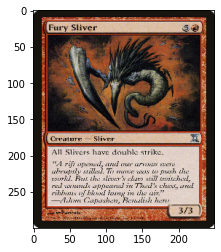

In [7]:
# printing a test image from the DF
plt.imshow(X[0])#change index here to change image
plt.show()

In [8]:
def list_2D(r, c):
    l = []
    for i in range(r):
        x = [0] * c
        l.append(x)
    return np.array(l)

In [9]:
#Convert labels from a list of names into one hot encodings
#Have the rest of the characters passed the length of the label to a 'null' one hot encoding
def labelsToOneHotEncodings_2(arr):    
    MAX_NUM_CHARS = 36 #Maxium number of characters a label can be
    SPECIAL_CHARS = 69 #Maxium number of special characters the one hot encoding will have
    count = 0
    
    #Array to contain each label's one hot encoding, 2-D arrays
    encodings = []
    
    #Convert each label into 2-D array to represent the one hot encoding
    for label in arr:
        count = count + 1
        i,j = -1,0 #Indexes for the postion to mark 1 into the 2-D array
        labelMat = list_2D(MAX_NUM_CHARS,SPECIAL_CHARS) #Special Characters by Max Number of Characters
        
        #Find the location to mark 1 into the one hot encoding that represents each character in the label
        for character in label:
        #Increase the position of the 2-D matrix to mark by each character in the label
            i+=1
                        
            #Check the character to determine the index of where to mark in the 2-D matrix
            if (((ord(character) - ord('a')) >= 0) and ((ord(character) - ord('a')) < 26)):#Lowercase Alphabet
                j = ord(character) - ord('a')
            elif (((ord(character) - ord('A')) >= 0) and ((ord(character) - ord('A')) < 26)):#Uppercase Alphabet
                j = 26 + (ord(character) - ord('A'))
            elif (((ord(character) - ord('0')) >= 0) and ((ord(character) - ord('0')) < 10)):#0-9
                j = 52 + (ord(character) - ord('0'))
            elif (ord(character) == 32):#' '
                j = 62
            elif (ord(character) == 44):#','
                j = 63
            elif (ord(character) == 45):#'-'
                j = 64
            elif (ord(character) == 39):#"'"
                j = 65
            elif (ord(character) == 47):#'/'
                j = 66
            elif (ord(character) == 64):#'@' null character
                j = 68
            else: #Garbage
                j = 67
            
            try:
                #Mark 1 into the position of the one hot encoding based on the indexes
                labelMat[i][j] = 1
            except:
                #Error Message for determing which label is causing issues for special character debugging
                print(label)
                print(len(label))
                print(count)
                break
                
                
        #Fill the rest of the missing characters of the label with the 'null' character one hot encodings
        for row in range(len(label),MAX_NUM_CHARS):
            labelMat[row][SPECIAL_CHARS-1] = 1
        
        #Add the one hot encoded matrix of the label into the list of labels' one hot encodings
        encodings.append(labelMat)
    
    #Return the encoded labels, the max number of characters, and the max number of special characters
    return np.array(encodings), MAX_NUM_CHARS, SPECIAL_CHARS

In [10]:
Y = []
for item in df['name'][0:elm_num]:#
    Y.append(item)

Y, row, col = labelsToOneHotEncodings_2(Y)

Burning Cinder Fury of Crimson Chaos Fire
41
2864
Infernal Spawn of Infernal Spawn of Evil
40
7420
The Ultimate Nightmare of Wizards of the Coast® Customer Service
64
11341


In [11]:
def oneHotEncodingToWord(encoding):
    #String to capture the word decoded from the one hot encodings
    word = ""
    
    #Decode each character in the onehot encoding and add the character to the word
    for i in range(len(encoding)):
        #Find the index that is the character represented by the one hot encoding
        #j = linearsearch(encoding[i],1)
        j = np.argmax(encoding[i],-1)
        
        #Decode the index to represent a special character
        #Then apply the character to the end of the word
        if (j == 68 or j == 67): #Null or garbage characters
            break
        elif (j >= 0 and j < 26): #Lowercase Aplhabet
            word = word + chr(97 + j)
        elif (j >= 26 and j < 52): #Uppercase Aplhabet
            j = j - 26
            word = word + chr(65 + j)
        elif (j >= 52 and j < 62): #Digits (0-9)
            j = j - 52
            word = word + chr(48 + j)
        elif (j == 62): #Space character
            word = word + " "
        elif (j == 63): #Comma character
            word = word + ','
        elif (j == 64): #Dash character
            word = word + '-'
        elif (j == 65): #Hyphen charcter
            word = word + "'"
        elif (j == 66): #Foward slash character
            word = word + '/'

    return word

In [12]:
oneHotEncodingToWord(Y[9])

'Wall of Roots'

In [13]:
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

data_generator = keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.0,
    height_shift_range=0.0,
    rotation_range=0,
    zoom_range=0.0,
    horizontal_flip=False)
split_point = int(0.7*elm_num)
dg_trainer = data_generator.flow(X[:split_point],
                                 Y[:split_point],
                                 batch_size=32)

In [53]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
values = initializer(shape=(250, 300))

x = keras.layers.Input(X.shape[1:])#Keep this
y = x#Keep this
y = keras.layers.Conv2D(64, kernel_size=(8,8),strides=(2,2), activation='relu')(y)
y = keras.layers.MaxPooling2D(pool_size=(4,4))(y)
y = keras.layers.Dropout(0.2)(y)
y = keras.layers.Conv2D(128, kernel_size=(8,8),strides=(2,2), activation='relu')(y)
y = keras.layers.MaxPooling2D(pool_size=(4,4))(y)
y = keras.layers.Dropout(0.2)(y)
y = keras.layers.Flatten()(y)
y = keras.layers.Dense(row*col)(y)#Keep this
y = keras.layers.Reshape((row,col))(y)#Keep this

# y = keras.layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(y)
# y = keras.layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(y)

# y = keras.layers.Flatten()(y)
# y = keras.layers.Dense(row*col)(y)#Keep this
# y = keras.layers.Reshape((row,col))(y)#Keep this

model = keras.Model(x,y)
model.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(),
              metrics=[keras.metrics.CategoricalAccuracy()])
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 300, 250, 3)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 147, 122, 64)      12352     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 36, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 36, 30, 64)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 15, 12, 128)       524416    
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 3, 3, 128)        0         
 g2D)                                                      

In [54]:
#keras.utils.plot_model(model,show_shapes=True,expand_nested=True)

In [55]:
epochs = 10
history = model.fit(dg_trainer,
                    epochs=epochs,
                    verbose=1,
                    validation_data = (X[split_point:],Y[split_point:]))

Epoch 1/10
329/329 [==============================] - 168s 508ms/step - loss: 11.6859 - categorical_accuracy: 0.3948 - val_loss: 11.2676 - val_categorical_accuracy: 0.3964
Epoch 2/10
329/329 [==============================] - 167s 506ms/step - loss: 10.6895 - categorical_accuracy: 0.3966 - val_loss: 10.7183 - val_categorical_accuracy: 0.3975
Epoch 3/10
329/329 [==============================] - 170s 516ms/step - loss: 10.1036 - categorical_accuracy: 0.3985 - val_loss: 9.0256 - val_categorical_accuracy: 0.4006
Epoch 4/10
329/329 [==============================] - 184s 559ms/step - loss: 9.8702 - categorical_accuracy: 0.3974 - val_loss: 9.3087 - val_categorical_accuracy: 0.4024
Epoch 5/10
329/329 [==============================] - 182s 554ms/step - loss: 9.4461 - categorical_accuracy: 0.3937 - val_loss: 8.8915 - val_categorical_accuracy: 0.3846
Epoch 6/10
329/329 [==============================] - 181s 551ms/step - loss: 9.0713 - categorical_accuracy: 0.3995 - val_loss: 7.7380 - val_cate

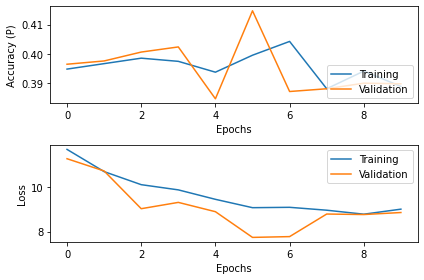

In [56]:
plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.ylabel('Accuracy (P)')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='lower right')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show() 


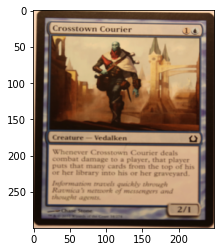

In [57]:
import matplotlib.image as mpimg
img = mpimg.imread('Results/card5.png')
imgplot = plt.imshow(img)
plt.show()


In [65]:
pic = []
img_array = cv2.imread('Results/card5.png')
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array = cv2.resize(img_array, (IMG_SIZE1, IMG_SIZE2))
pic.append(img_array)
pic = np.asarray(pic)
#Predictions from the Reading Neural Network
preds = model.predict(pic)

#Decode the predictions into words
for i in range(1):
    print('Predicted', i, ' :', oneHotEncodingToWord(preds[i]))
    
#preds

Predicted 0  : Grlueiieee aee
